In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

C:\Users\gnssl\anaconda3\envs\myvenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./cic_ids_smote03_pca25.csv")
#df = pd.read_csv("/Users/anchanghun/Downloads/CIC-Dataset/cleaned_improved_cicids2017.csv")

In [4]:
df.head()

PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0  3.755787 -1.071812   2.930933 -2.446960  3.825755 -6.790677 -9.097402   
1  4.255976 -3.447895  -2.044386  0.607399  1.420579  0.635792 -1.034094   
2  7.099579 -0.328671  15.021956 -4.085954  4.485459 -6.750818 -1.245696   
3  5.499027 -2.232074   0.323932 -0.687445  3.269052 -1.383862 -6.764744   
4  5.595111 -2.244346   0.295866 -0.677989  3.272865 -1.382852 -6.767350   

         PC8        PC9      PC10  ...      PC17      PC18       PC19  \
0   3.715448  -1.080617  0.002021  ... -2.334503 -1.591972  -0.751660   
1  -1.987434  -2.420484  0.016586  ...  0.399538  0.307386   0.392462   
2  12.284609 -12.470846  0.073562  ... -4.114029  2.403140  14.790264   
3   0.350936  -4.496568  0.037441  ...  4.034838  2.231003  -0.575002   
4   0.317522  -4.523027  0.037608  ...  4.032456  2.232305  -0.571224   

       PC20      PC21      PC22      PC23      PC24      PC25  label  
0 -0.430237 -0.189769  0.992952 -3.140185  3.106113 -0.005396      0  
1  0.045101  0.053932 -0.531625  0.367233 -0.001627  0.483978      0  
2 -0.072217 -5.309932 -2.786611  9.262720  5.324074 -3.618367      0  
3  0.090285  1.567744  0.082298 -0.482082  1.259168  1.329641      0  
4  0.090600  1.565802  0.073913 -0.477891  1.255216  1.337643      0  

[5 rows x 26 columns]

In [5]:
df['label'].value_counts()

label
0    1594540
6     159454
8     159454
5     159454
4     159454
3     159454
2     159454
7     159454
1     159454
Name: count, dtype: int64

In [6]:
len(df.columns)

26

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((2583154, 26), (287018, 26))

In [8]:
X_train_normal = X_train[X_train['label'] == 0]
X_train_normal.shape

(1435279, 26)

In [9]:
X_test.shape

(287018, 26)

In [10]:
y_test = X_test['label']
X_test = X_test.drop(labels='label',axis=1)

In [11]:
y_train_normal = X_train_normal['label']
X_train_normal = X_train_normal.drop(labels='label', axis=1)

In [12]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Model, Input
import numpy as np
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# ‚úÖ ÌÅ¥ÎûòÏä§ Í∞úÏàò ÏÑ§Ï†ï (Ï¥ù 9Í∞ú: Ï†ïÏÉÅ + 8Í∞ú Í≥µÍ≤©)
num_classes = 9

# ‚úÖ Ïû†Ïû¨ Ï∞®Ïõê Î∞è Ï§ëÍ∞Ñ Ï∞®Ïõê ÏÑ§Ï†ï
latent_dim = 10
inter_dim = 20

# ‚úÖ ÏÉòÌîåÎßÅ Ìï®Ïàò (Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôî Ìä∏Î¶≠ ÏÇ¨Ïö©) -> ÏïàÏ†ïÏ†ÅÏù∏ ÏÉòÌîåÎßÅ Ï†ÅÏö©
def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * K.clip(z_log_sigma, -10, 10)) * epsilon  # NaN Î∞©ÏßÄ

# ‚úÖ ÏïàÏ†ïÏ†ÅÏù∏ VAE ÏÜêÏã§ Ìï®Ïàò (NaN Î∞©ÏßÄ)
def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.mean(K.square(x - x_decoded_mean) + 1e-10)  # NaN Î∞©ÏßÄ
    kl_loss = -0.5 * K.sum(1 + K.clip(z_log_sigma, -10, 10) - K.square(z_mean) - K.exp(K.clip(z_log_sigma, -10, 10)), axis=-1)  # ÏïàÏ†ïÌôî
    kl_loss_weighted = kl_loss * 0.0001  # KL ÏÜêÏã§ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    total_loss = K.mean(reconstruction_loss + kl_loss_weighted)
    return total_loss

# ‚úÖ CNN-Based CVAE Î™®Îç∏ Ï†ïÏùò
def cvae(X):
    features = X.shape[1]  # ÌäπÏßï Ïàò
    input_x = Input(shape=(features,), name='InputFeatures')  

    # CNN Í∏∞Î∞ò Ïù∏ÏΩîÎçî
    reshaped_input = layers.Reshape((features, 1))(input_x)  # 1D Conv ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú Ï∞®Ïõê Î≥ÄÌôò
    h = layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding='same')(reshaped_input)
    h = layers.Conv1D(filters=32, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Conv1D(filters=16, kernel_size=3, activation="relu", padding='same')(h)
    h = layers.Flatten()(h)
    h = layers.Dense(inter_dim, activation='relu')(h)

    # Ïû†Ïû¨ Í≥µÍ∞Ñ
    z_mean = layers.Dense(latent_dim, name='z_mean')(h)
    z_log_sigma = layers.Dense(latent_dim, name='z_log_sigma')(h)
    z = layers.Lambda(sampling, name='z')([z_mean, z_log_sigma])

    # ÎîîÏΩîÎçî
    decoder1 = layers.Dense(features * inter_dim)(z)
    decoder1 = layers.Reshape((features, inter_dim))(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=16, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=32, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Conv1DTranspose(filters=64, kernel_size=3, activation="relu", padding='same')(decoder1)
    decoder1 = layers.Flatten()(decoder1)
    decoder1 = layers.Dense(features, activation='sigmoid')(decoder1)  # ÏµúÏ¢Ö Î≥µÏõê

    model = Model(input_x, decoder1)
    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))

    return model

# ‚úÖ Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Îßå ÌïôÏäµ
model = cvae(X_train_normal)  # Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î°úÎßå ÌïôÏäµ
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_normal, X_train_normal,
                    shuffle=True, epochs=50, validation_split=0.1, batch_size=32,
                    callbacks=[early_stopping])



Epoch 1/50
40368/40368 [==============================] - 171s 4ms/step - loss: 2.6999 - accuracy: 0.8827 - val_loss: 2.0547 - val_accuracy: 0.8885
Epoch 2/50
40368/40368 [==============================] - 165s 4ms/step - loss: 2.6727 - accuracy: 0.8987 - val_loss: 2.0444 - val_accuracy: 0.9094
Epoch 3/50
40368/40368 [==============================] - 163s 4ms/step - loss: 2.6681 - accuracy: 0.9031 - val_loss: 2.0427 - val_accuracy: 0.9067
Epoch 4/50
40368/40368 [==============================] - 165s 4ms/step - loss: 2.6669 - accuracy: 0.9003 - val_loss: 2.0417 - val_accuracy: 0.9051
Epoch 5/50
40368/40368 [==============================] - 162s 4ms/step - loss: 2.6640 - accuracy: 0.8980 - val_loss: 2.0391 - val_accuracy: 0.9115
Epoch 6/50
40368/40368 [==============================] - 165s 4ms/step - loss: 2.6633 - accuracy: 0.8954 - val_loss: 2.0380 - val_accuracy: 0.9057
Epoch 7/50
40368/40368 [==============================] - 164s 4ms/step - loss: 2.6633 - accuracy: 0.9000 - val_

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
# ‚úÖ X_test Îç∞Ïù¥ÌÑ∞Î°ú CVAE Î≥µÏõê ÏòàÏ∏° ÏàòÌñâ
X_pred = model.predict(X_test)

# ‚úÖ Î≥µÏõê Ïò§Î•ò (MSE) Í≥ÑÏÇ∞
reconstruction_errors = np.mean(np.square(X_test - X_pred), axis=1)

# ‚úÖ error_df ÏÉùÏÑ± (Ïã§Ï†ú ÎùºÎ≤® Ìè¨Ìï®)
error_df = pd.DataFrame({
    'reconstruction_error': reconstruction_errors,
    'true_class': y_test  # Ïã§Ï†ú ÎùºÎ≤® (0: Ï†ïÏÉÅ, 1~8: Í≥µÍ≤©)
})

# ‚úÖ IQR Í∏∞Î∞ò Threshold ÏÑ§Ï†ï (Ïù¥ÏÉÅ ÌÉêÏßÄÎ•º ÏúÑÌïú ÏûÑÍ≥ÑÍ∞í Í≤∞Ï†ï)
Q1 = np.percentile(error_df['reconstruction_error'], 25)
Q3 = np.percentile(error_df['reconstruction_error'], 75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR  # ÏùºÎ∞òÏ†ÅÏù∏ Ïù¥ÏÉÅ ÌÉêÏßÄ Í∏∞Ï§Ä

# ‚úÖ Threshold Í∏∞Î∞ò Î∂ÑÎ•ò (Ï†ïÏÉÅ: 0, Ïù¥ÏÉÅ: 1)
error_df['pred_class'] = (error_df['reconstruction_error'] > threshold).astype(int)



8970/8970 [==============================] - 12s 1ms/step


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# ‚úÖ Confusion Matrix Ï∂úÎ†•
cm = confusion_matrix(error_df['true_class'] > 0, error_df['pred_class'])  # Ï†ïÏÉÅ vs Í≥µÍ≤©
print("Confusion Matrix:\n", cm)

# ‚úÖ Classification Report Ï∂úÎ†•
print("Classification Report:\n", classification_report(error_df['true_class'] > 0, error_df['pred_class']))

Confusion Matrix:
 [[150483   8778]
 [ 92172  35585]]
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.94      0.75    159261
        True       0.80      0.28      0.41    127757

    accuracy                           0.65    287018
   macro avg       0.71      0.61      0.58    287018
weighted avg       0.70      0.65      0.60    287018



In [17]:
error_df

reconstruction_error  true_class  pred_class
1586856              2.000795           1           0
146821               0.675321           0           0
301814               0.358603           0           0
193979               0.171642           0           0
202567               0.592379           0           0
...                       ...         ...         ...
2445725              3.607769           5           1
1258801             44.974897           0           1
629394               0.443338           0           0
1122026              3.864216           0           1
2247814              0.246226           4           0

[287018 rows x 3 columns]

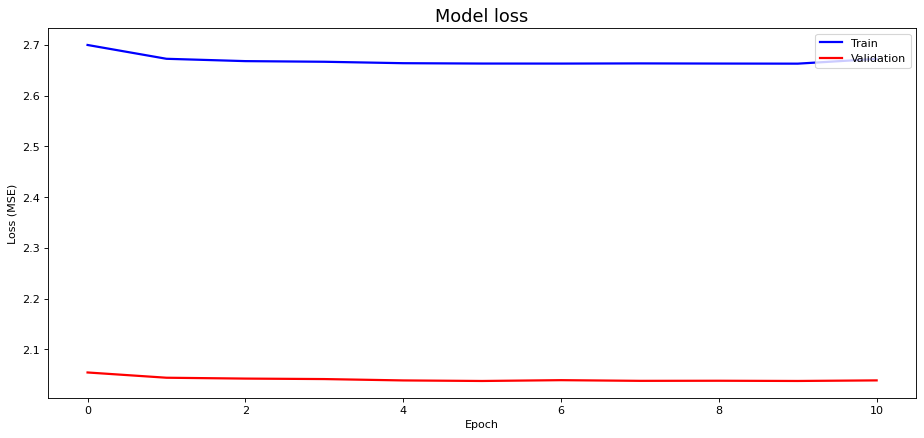

In [18]:
# Plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (MSE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [19]:
import pandas as pd
import numpy as np

# ‚úÖ X_test Îç∞Ïù¥ÌÑ∞Î°ú CVAE Î≥µÏõê ÏòàÏ∏° ÏàòÌñâ
X_pred = model.predict(X_test)

# ‚úÖ Î≥µÏõê Ïò§Î•ò (MSE) Í≥ÑÏÇ∞
reconstruction_errors = np.mean(np.square(X_test - X_pred), axis=1)

# ‚úÖ error_df ÏÉùÏÑ± (Ïã§Ï†ú ÎùºÎ≤® Ìè¨Ìï®)
error_df = pd.DataFrame({
    'reconstruction_error': reconstruction_errors,
    'true_class': y_test  # 0 (Ï†ïÏÉÅ) ~ 8 (Í∞Å Í≥µÍ≤©)
})

# ‚úÖ ÌÅ¥ÎûòÏä§Î≥Ñ Threshold ÏÑ§Ï†ï (IQR Î∞©Ïãù)
thresholds = {}
for label in range(9):  # 0 (Ï†ïÏÉÅ) ~ 8 (Í∞Å Í≥µÍ≤©)
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error']
    Q1 = np.percentile(class_errors, 25)
    Q3 = np.percentile(class_errors, 75)
    IQR = Q3 - Q1
    thresholds[label] = Q3 + 1.5 * IQR  # Ïù¥ÏÉÅ ÌÉêÏßÄ Í∏∞Ï§Ä

# ‚úÖ Threshold Í∏∞Î∞ò Í≥µÍ≤© Î∂ÑÎ•ò (ÏµúÏÜå Ï∞®Ïù¥ Í∏∞Ï§Ä)
def classify_error(error_value):
    min_diff = float('inf')
    best_class = 0  # Í∏∞Î≥∏Í∞íÏùÄ Ï†ïÏÉÅ
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
    return best_class

error_df['pred_class'] = error_df['reconstruction_error'].apply(classify_error)



8970/8970 [==============================] - 12s 1ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# ‚úÖ Confusion Matrix Ï∂úÎ†•
cm = confusion_matrix(error_df['true_class'], error_df['pred_class'])
print("Confusion Matrix:\n", cm)

# ‚úÖ Classification Report Ï∂úÎ†•
print("Classification Report:\n", classification_report(error_df['true_class'], error_df['pred_class']))

Confusion Matrix:
 [[  3407   1193   1571   4883   1499   2487  11707   6390 126124]
 [   257   1147    251   6106      0      1   7959     63     64]
 [   112   1265    878   4582    220     16   5322    102   3528]
 [    21    273     90   5119      0      0  10481      4      1]
 [     0   3818   8242    553    645      0     16      2   2658]
 [    28   4299    100   3925   4305    178    705     63   2469]
 [     0      0      0      0      0      0  15870      0     87]
 [   251     26     47    146     36    118   1227    545  13493]
 [    76      2      0     10      0      0     80    101  15774]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.02      0.04    159261
           1       0.10      0.07      0.08     15848
           2       0.08      0.05      0.06     16025
           3       0.20      0.32      0.25     15989
           4       0.10      0.04      0.06     15934
           5       0.06      0.01    

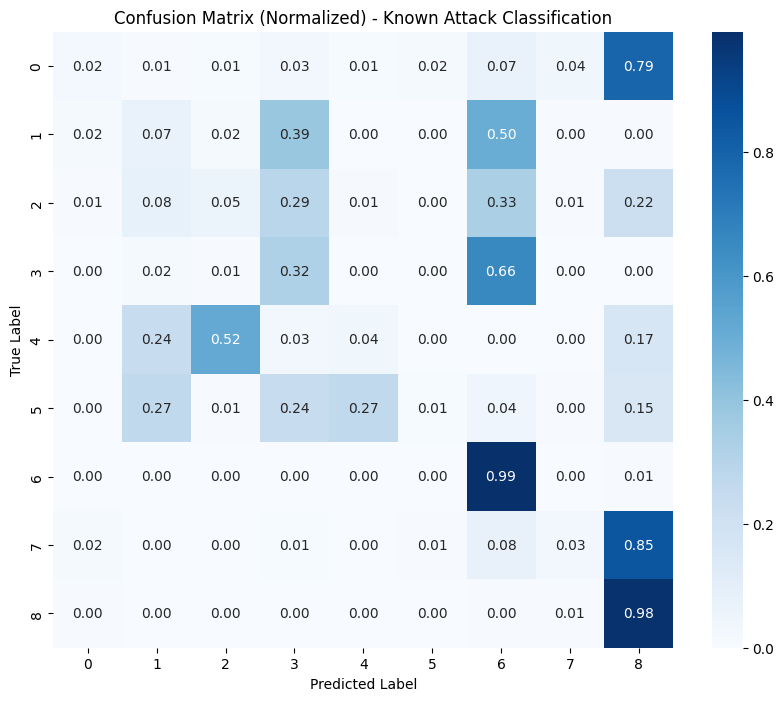

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ‚úÖ Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏° ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
y_true = error_df['true_class'].values  # Ïã§Ï†ú ÎùºÎ≤®
y_pred = error_df['pred_class'].values  # ÏòàÏ∏° ÎùºÎ≤®

# ‚úÖ "Unknown" Í≥µÍ≤©ÏùÑ Ï†úÏô∏ÌïòÍ≥† Ï†ïÏÉÅ + 8Í∞ú Í≥µÍ≤©ÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
valid_classes = list(range(9))  # 0 (Ï†ïÏÉÅ) ~ 8 (Í≥µÍ≤© ÌÅ¥ÎûòÏä§)
mask = np.isin(y_true, valid_classes)  # Unknown Ï†úÏô∏
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=valid_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=valid_classes, yticklabels=valid_classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Known Attack Classification")
plt.show()

In [22]:
from scipy.stats import genpareto
import numpy as np

# ‚úÖ ÌÅ¥ÎûòÏä§Î≥Ñ reconstruction error Î∂ÑÌè¨ Î™®Îç∏ÎßÅ (EVT Ï†ÅÏö©)
thresholds = {}

for label in range(9):  # Ï†ïÏÉÅ(0) + Í≥µÍ≤©(1~8)
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        # ‚úÖ EVT Ï†ÅÏö© (Generalized Pareto Distribution - GPD)
        shape, loc, scale = genpareto.fit(class_errors)
        
        # ‚úÖ Threshold ÏÑ§Ï†ï (ÎÖºÎ¨∏ÏóêÏÑúÎäî ÌèâÍ∑† Ï¥àÍ≥º ÏûÑÍ≥óÍ∞í ÏÇ¨Ïö©)
        thresholds[label] = loc + (scale / (1 - shape))  # EVT ÏûÑÍ≥ÑÍ∞í Í≥ÑÏÇ∞
    else:
        thresholds[label] = np.percentile(class_errors, 95)  # ÏÉòÌîå Î∂ÄÏ°± Ïãú Percentile ÏÇ¨Ïö©

print("üìå EVT Í∏∞Î∞ò Threshold Í∞í:", thresholds)

üìå EVT Í∏∞Î∞ò Threshold Í∞í: {0: 1.064124197861768, 1: 2.1215735997512466, 2: 2.081805037340466, 3: 1.8204165556483238, 4: 4.444981105103542, 5: 5.038471581006711, 6: 0.6796787438257781, 7: 0.7630419274268876, 8: 0.7483414054134274}


In [23]:
# ‚úÖ EVT Í∏∞Î∞ò Î∂ÑÎ•ò Ìï®Ïàò
def classify_error_evt(error_value):
    min_diff = float('inf')
    best_class = 0  # Í∏∞Î≥∏Í∞í (Ï†ïÏÉÅ)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ‚úÖ error_dfÏóê ÏÉàÎ°úÏö¥ EVT Í∏∞Î∞ò ÏòàÏ∏° ÌÅ¥ÎûòÏä§ Ï∂îÍ∞Ä
error_df['pred_class_evt'] = error_df['reconstruction_error'].apply(classify_error_evt)


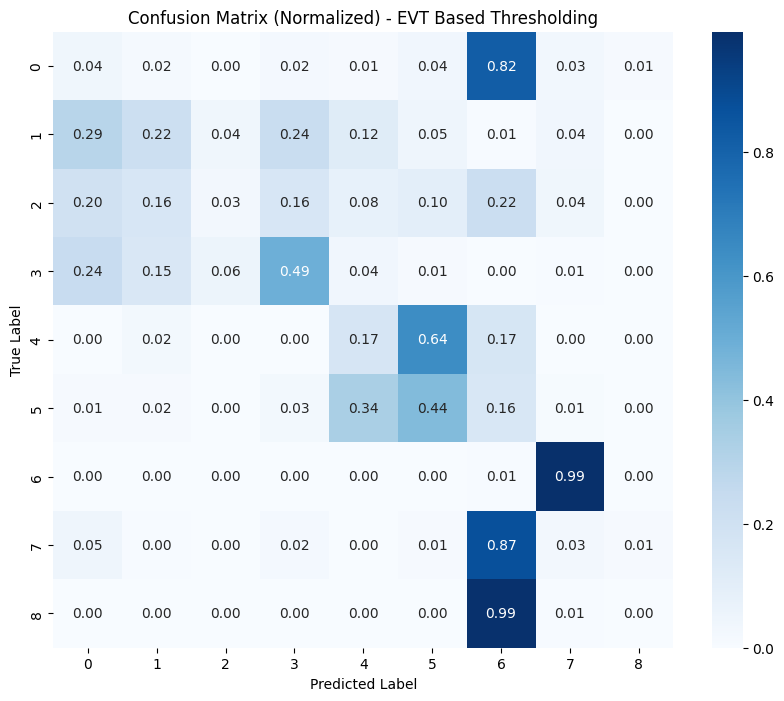

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ Ïã§Ï†ú ÎùºÎ≤®Í≥º EVT ÏòàÏ∏° ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
y_true = error_df['true_class'].values
y_pred_evt = error_df['pred_class_evt'].values

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(y_true, y_pred_evt, labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - EVT Based Thresholding")
plt.show()

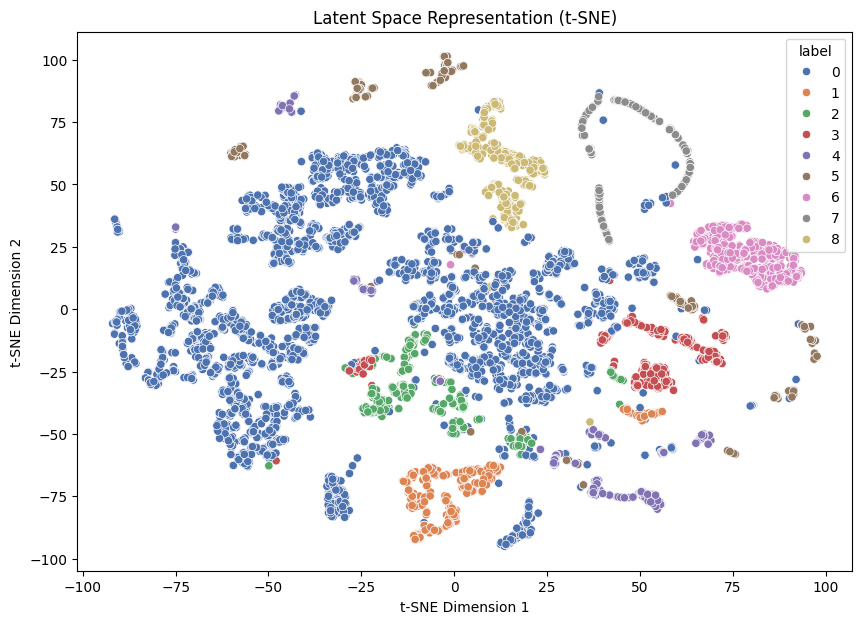

In [25]:
import numpy as np
import tensorflow.keras.backend as K
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# ‚úÖ Î™®Îç∏ÏóêÏÑú z_mean Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò
z_mean_layer = model.get_layer("z_mean")
z_mean_function = K.function([model.input], [z_mean_layer.output])

# ‚úÖ ÎØ∏ÎãàÎ∞∞Ïπò(batch)Î°ú z_mean Ï∂îÏ∂ú (OOM Î∞©ÏßÄ)
batch_size = 1024  # ‚úÖ Î©îÎ™®Î¶¨ Ï†àÏïΩÏùÑ ÏúÑÌï¥ ÏûëÏùÄ Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÇ¨Ïö©
z_mean_list = []

for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i+batch_size]
    z_mean_batch = z_mean_function([batch])[0]
    z_mean_list.append(z_mean_batch)

# ‚úÖ NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
z_mean_values = np.vstack(z_mean_list)

# ‚úÖ X_test ÌÅ¨Í∏∞ Ï§ÑÏù¥Í∏∞ (ÏµúÎåÄ 10,000Í∞ú ÏÉòÌîåÎßå ÏÇ¨Ïö©)
sample_size = min(10000, len(z_mean_values))  # 10,000Í∞ú Ïù¥ÌïòÎ°ú Ï†úÌïú
z_mean_sampled = z_mean_values[:sample_size]
y_test_sampled = y_test[:sample_size]

# ‚úÖ t-SNE Ï†ÅÏö© (X_test ÏÉòÌîå ÏàòÎ≥¥Îã§ perplexityÍ∞Ä ÏûëÏïÑÏïº Ìï®)
tsne = TSNE(n_components=2, perplexity=min(30, len(z_mean_sampled)-1), random_state=42)
z_tsne = tsne.fit_transform(z_mean_sampled)

# ‚úÖ t-SNE Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 7))
sns.scatterplot(x=z_tsne[:, 0], y=z_tsne[:, 1], hue=y_test_sampled, palette="deep")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Latent Space Representation (t-SNE)")
plt.show()

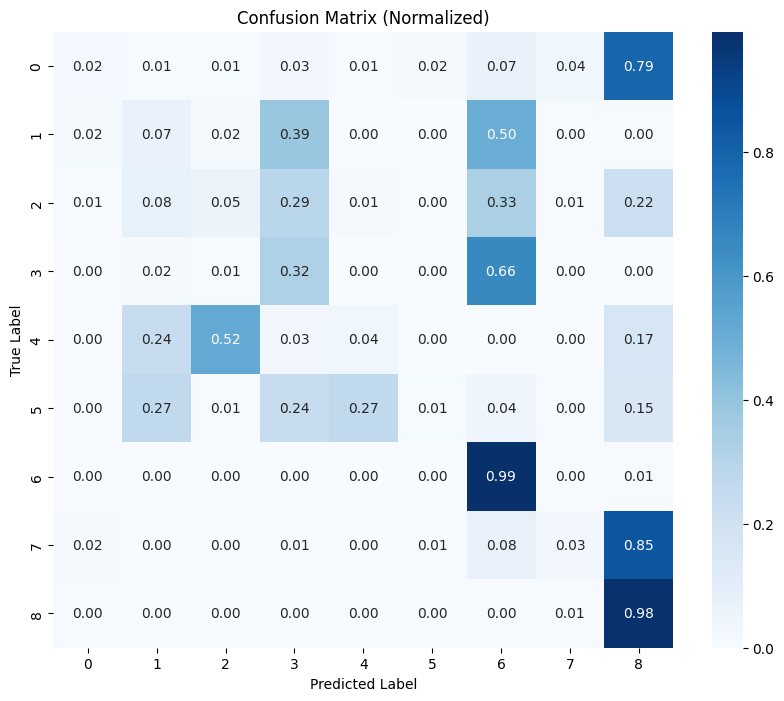

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏° ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
y_true = error_df['true_class'].values
y_pred = error_df['pred_class'].values

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(y_true, y_pred, labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized)")
plt.show()

In [27]:
from scipy.stats import genpareto
import numpy as np

thresholds = {}

for label in range(9):  # 0(Ï†ïÏÉÅ) + 8Í∞ú Í≥µÍ≤©
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        shape, loc, scale = genpareto.fit(class_errors)
        thresholds[label] = loc + (scale / (1 - shape))  # EVT Í∏∞Î∞ò threshold ÏÑ§Ï†ï
    else:
        thresholds[label] = np.percentile(class_errors, 95)  # Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°± Ïãú percentile Ï†ÅÏö©

print("üìå EVT Í∏∞Î∞ò Threshold Í∞í:", thresholds)

üìå EVT Í∏∞Î∞ò Threshold Í∞í: {0: 1.064124197861768, 1: 2.1215735997512466, 2: 2.081805037340466, 3: 1.8204165556483238, 4: 4.444981105103542, 5: 5.038471581006711, 6: 0.6796787438257781, 7: 0.7630419274268876, 8: 0.7483414054134274}


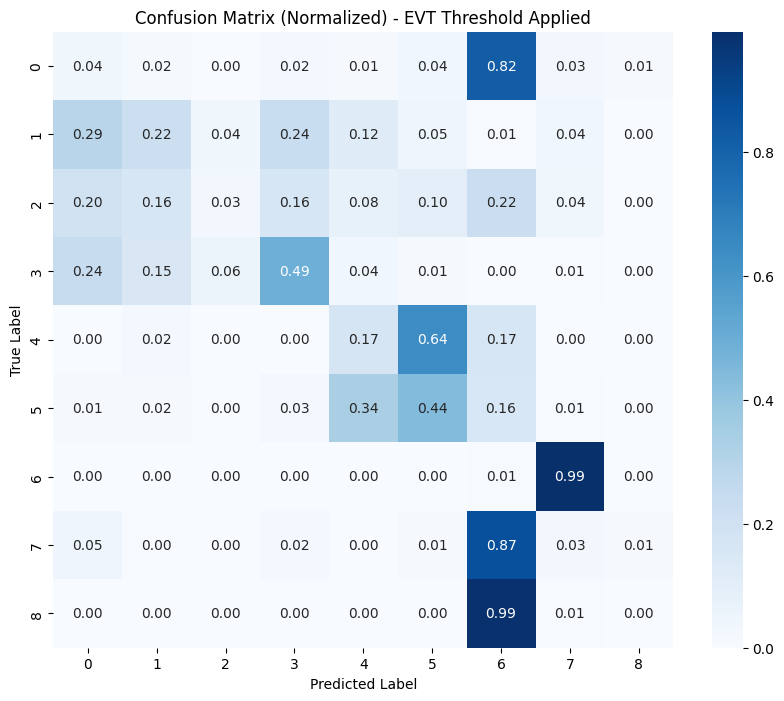

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ ÏÉàÎ°úÏö¥ EVT Í∏∞Î∞ò threshold Ï†ÅÏö© ÌõÑ ÏòàÏ∏° ÏàòÌñâ
error_df['pred_class_evt'] = error_df['reconstruction_error'].apply(lambda x: classify_error_evt(x))

# ‚úÖ Confusion Matrix ÏÉùÏÑ±
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_evt'], labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ Confusion Matrix ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - EVT Threshold Applied")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


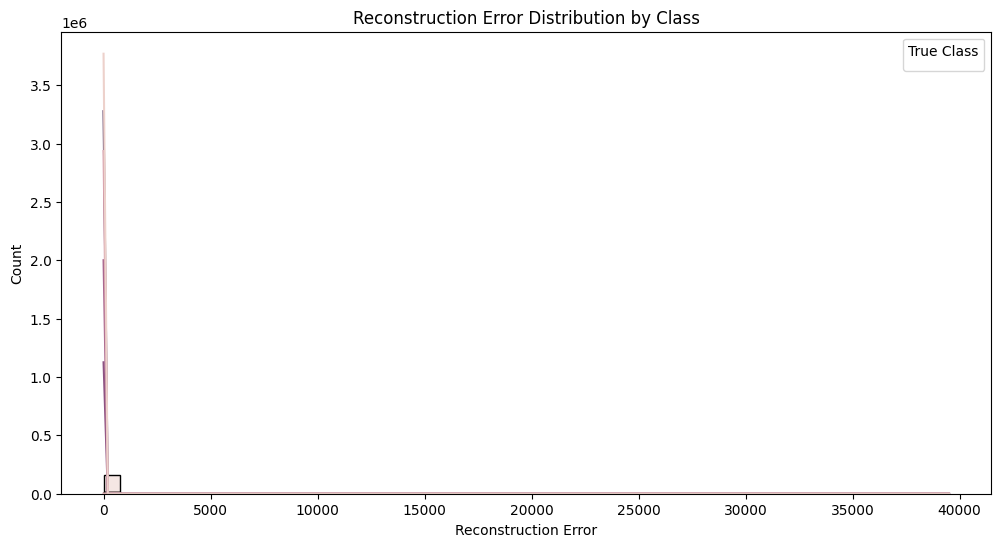

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=error_df, x="reconstruction_error", hue="true_class", bins=50, kde=True)
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.title("Reconstruction Error Distribution by Class")
plt.legend(title="True Class")
plt.show()

In [30]:
thresholds = {}

for label in range(9):  # 0(Ï†ïÏÉÅ) + 8Í∞ú Í≥µÍ≤©
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        thresholds[label] = np.percentile(class_errors, 98)  # ÌÅ¥ÎûòÏä§Î≥Ñ ÏµúÏ†Å Percentile ÏÑ§Ï†ï
    else:
        thresholds[label] = np.percentile(error_df['reconstruction_error'], 98)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÏÑ§Ï†ï

print("üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í:", thresholds)

üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í: {0: 10.833479267233898, 1: 5.471789535247676, 2: 7.640811411424759, 3: 4.065642522061923, 4: 8.368099391146364, 5: 13.718560373827252, 6: 0.8635290748602823, 7: 2.090879106827223, 8: 0.644197680500971}


In [31]:
def classify_error_dynamic(error_value):
    min_diff = float('inf')
    best_class = 0  # Í∏∞Î≥∏Í∞í (Ï†ïÏÉÅ)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Ï†ÅÏö©
error_df['pred_class_dynamic'] = error_df['reconstruction_error'].apply(classify_error_dynamic)

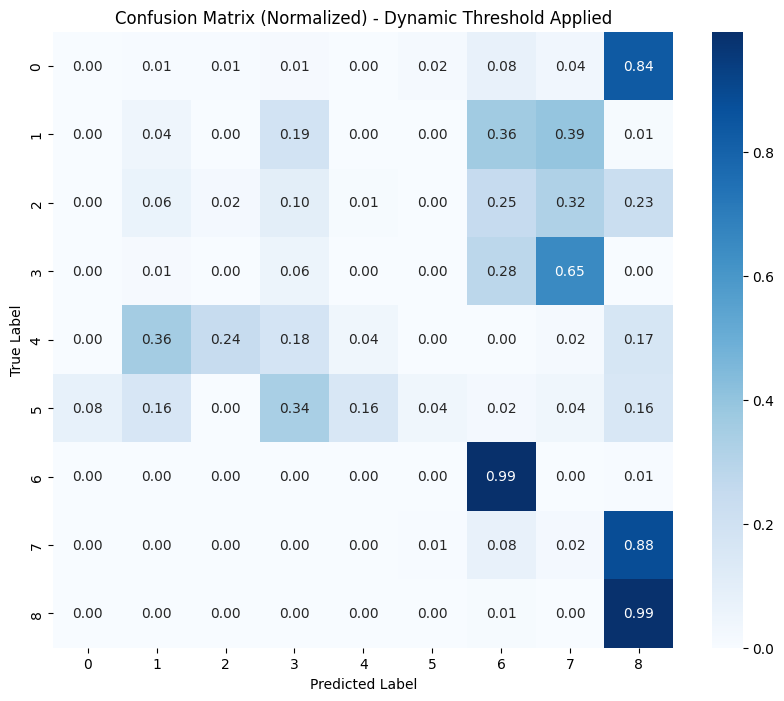

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Í≤∞Í≥º Í∏∞Î∞ò ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_dynamic'], labels=list(range(9)))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=list(range(9)), yticklabels=list(range(9)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Dynamic Threshold Applied")
plt.show()

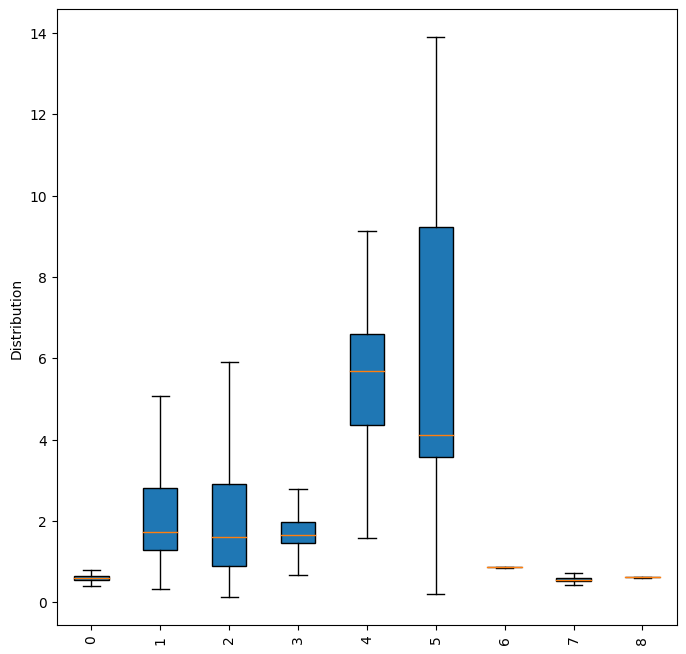

In [33]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï§ÄÎπÑ
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# Î∞ïÏä§ ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


In [34]:
import numpy as np

thresholds = {}

for label in sorted(error_df['true_class'].unique()):  # 0(Ï†ïÏÉÅ) + 8Í∞ú Í≥µÍ≤©
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        thresholds[label] = np.percentile(class_errors, 98)  # ÌÅ¥ÎûòÏä§Î≥Ñ ÏµúÏ†Å Percentile ÏÑ§Ï†ï
    else:
        thresholds[label] = np.percentile(error_df['reconstruction_error'], 98)  # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò ÏÑ§Ï†ï

print("üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í:", thresholds)

üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í: {0: 10.833479267233898, 1: 5.471789535247676, 2: 7.640811411424759, 3: 4.065642522061923, 4: 8.368099391146364, 5: 13.718560373827252, 6: 0.8635290748602823, 7: 2.090879106827223, 8: 0.644197680500971}


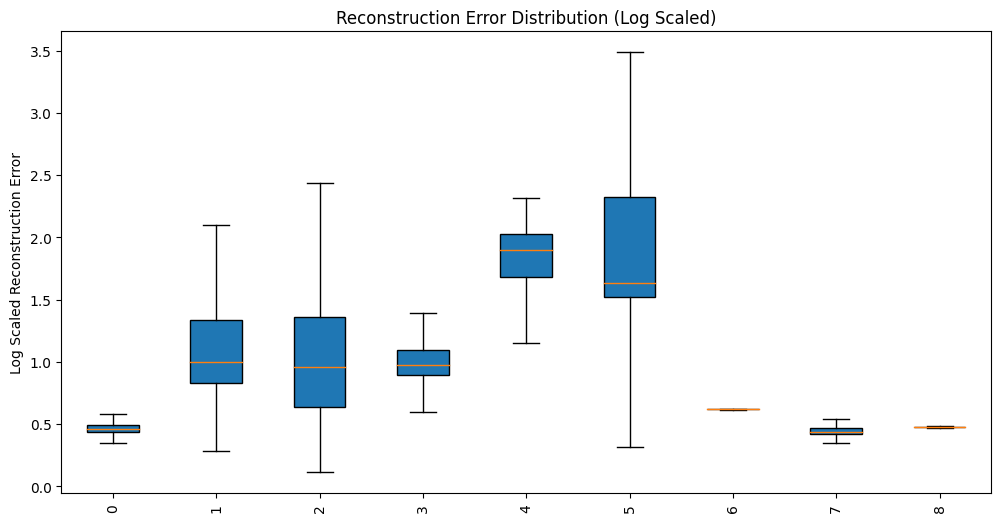

In [35]:
import numpy as np

# Reconstruction ErrorÍ∞Ä 0Î≥¥Îã§ ÏûëÏïÑÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ ÏûëÏùÄ Í∞í Ï∂îÍ∞Ä
error_df["log_reconstruction_error"] = np.log1p(error_df["reconstruction_error"])

plt.figure(figsize=(12, 6))
plt.boxplot(
    [error_df["log_reconstruction_error"][error_df["true_class"] == cls] for cls in sorted(error_df["true_class"].unique())],
    labels=sorted(error_df["true_class"].unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)
plt.ylabel("Log Scaled Reconstruction Error")
plt.xticks(rotation=90)
plt.title("Reconstruction Error Distribution (Log Scaled)")
plt.show()

In [36]:
def classify_error_dynamic(error_value):
    min_diff = float("inf")
    best_class = 0  # Í∏∞Î≥∏Í∞í (Ï†ïÏÉÅ)
    
    for cls, thresh in thresholds.items():
        diff = abs(error_value - thresh)
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Ï†ÅÏö©
error_df['pred_class_dynamic'] = error_df['reconstruction_error'].apply(classify_error_dynamic)

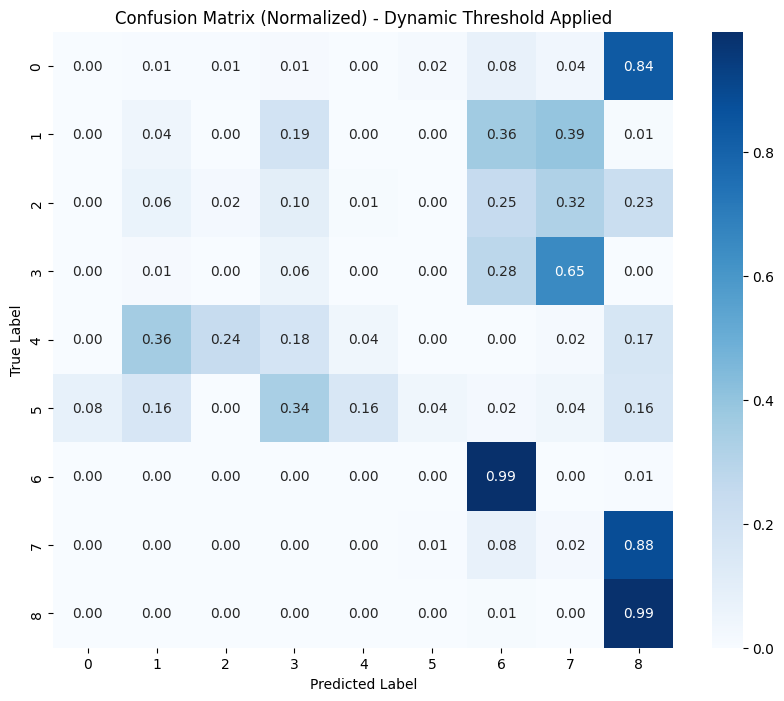

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Í≤∞Í≥º Í∏∞Î∞ò ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_dynamic'], labels=sorted(error_df['true_class'].unique()))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ Confusion Matrix ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=sorted(error_df['true_class'].unique()), yticklabels=sorted(error_df['true_class'].unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Dynamic Threshold Applied")
plt.show()

In [38]:
import numpy as np

# ‚úÖ ÌÅ¥ÎûòÏä§Î≥Ñ Reconstruction Error Threshold Í≥ÑÏÇ∞
thresholds = {}

for label in sorted(error_df['true_class'].unique()):  # 0(Ï†ïÏÉÅ) + 8Í∞ú Í≥µÍ≤©
    class_errors = error_df[error_df['true_class'] == label]['reconstruction_error'].values
    
    if len(class_errors) > 10:  # ÏµúÏÜå ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
        thresholds[label] = {
            "p95": np.percentile(class_errors, 95),
            "p98": np.percentile(class_errors, 98),
            "p99": np.percentile(class_errors, 99)
        }
    else:
        thresholds[label] = {
            "p95": np.percentile(error_df['reconstruction_error'], 95),
            "p98": np.percentile(error_df['reconstruction_error'], 98),
            "p99": np.percentile(error_df['reconstruction_error'], 99)
        }

print("üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í:", thresholds)

üìå ÏÉàÎ°≠Í≤å Í≥ÑÏÇ∞Îêú Threshold Í∞í: {0: {'p95': 3.284914738234613, 'p98': 10.833479267233898, 'p99': 28.238789210557247}, 1: {'p95': 4.722424704038044, 'p98': 5.471789535247676, 'p99': 5.509586464783895}, 2: {'p95': 6.017807734270972, 'p98': 7.640811411424759, 'p99': 8.466698445234991}, 3: {'p95': 3.2823235686857495, 'p98': 4.065642522061923, 'p99': 4.9528998789220635}, 4: {'p95': 6.7115700984697195, 'p98': 8.368099391146364, 'p99': 8.788699584165963}, 5: {'p95': 11.245946167580176, 'p98': 13.718560373827252, 'p99': 13.861440506647584}, 6: {'p95': 0.8623960387164993, 'p98': 0.8635290748602823, 'p99': 0.8642946444450831}, 7: {'p95': 1.3451028077285685, 'p98': 2.090879106827223, 'p99': 6.130771037871146}, 8: {'p95': 0.6308118165833753, 'p98': 0.644197680500971, 'p99': 0.7564329306027582}}


In [39]:
def classify_error_multi_threshold(error_value):
    min_diff = float("inf")
    best_class = 0  # Í∏∞Î≥∏Í∞í (Ï†ïÏÉÅ)
    
    for cls, thresh in thresholds.items():
        # ‚úÖ Ïó¨Îü¨ Í∞úÏùò Threshold Ï§ë Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í∞íÏúºÎ°ú ÏÑ†ÌÉù
        closest_threshold = min(thresh.values(), key=lambda x: abs(x - error_value))
        diff = abs(error_value - closest_threshold)
        
        if diff < min_diff:
            min_diff = diff
            best_class = cls
            
    return best_class

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Ï†ÅÏö©
error_df['pred_class_multi'] = error_df['reconstruction_error'].apply(classify_error_multi_threshold)

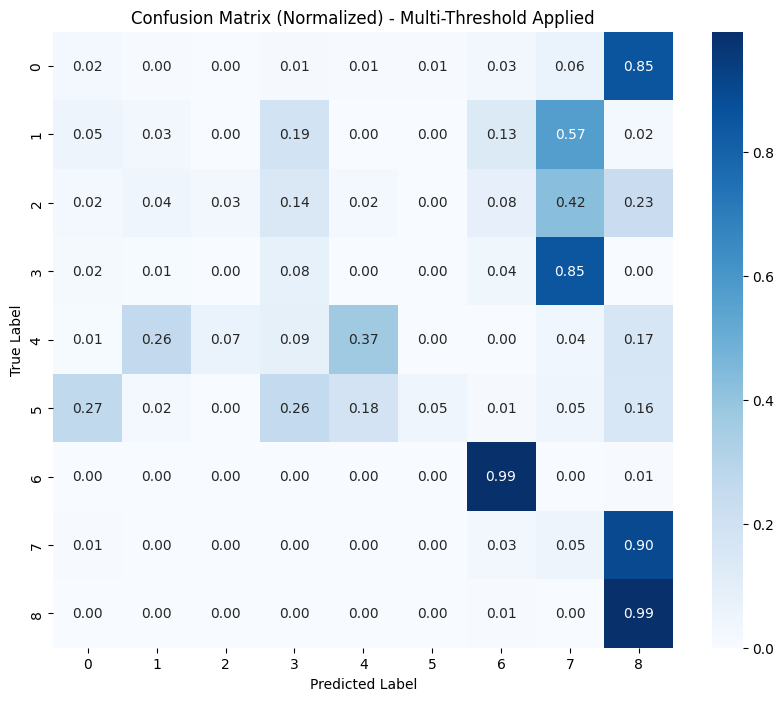

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ‚úÖ ÏÉàÎ°úÏö¥ Î∂ÑÎ•ò Í≤∞Í≥º Í∏∞Î∞ò ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
cm = confusion_matrix(error_df['true_class'], error_df['pred_class_multi'], labels=sorted(error_df['true_class'].unique()))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Ï†ïÍ∑úÌôî

# ‚úÖ Confusion Matrix ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=sorted(error_df['true_class'].unique()), yticklabels=sorted(error_df['true_class'].unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized) - Multi-Threshold Applied")
plt.show()